In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df_X= pd.read_csv('X.csv')

In [3]:
df_X = df_X.drop(df_X.columns[0:1], axis=1)

In [4]:
df_X.head()

,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,flrs_1,flrs_1_5,flrs_2,flrs_2_5,flrs_3,flrs_3_5,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
0,-1.726549,-0.279725,-1.125582,-0.351367,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.339661,-0.279725,0.709463,1.160045,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.726549,-1.711651,-2.131943,1.281504,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.072660,0.736243,0.070676,-0.282062,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.039555,-0.279725,-0.292732,0.410214,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_y= pd.read_csv('y.csv')

In [6]:
df_y = df_y.drop(df_y.columns[0:1], axis=1)

In [7]:
df_y.head()

,log_price
0,-1.402030
1,0.279945
2,-1.799472
3,0.499710
4,0.178438


In [8]:
df = pd.concat([df_y, df_X], axis=1)

In [9]:
df.head()

,log_price,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,flrs_1,flrs_1_5,flrs_2,flrs_2_5,flrs_3,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
0,-1.402030,-1.726549,-0.279725,-1.125582,-0.351367,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.279945,0.339661,-0.279725,0.709463,1.160045,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.799472,-1.726549,-1.711651,-2.131943,1.281504,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.499710,1.072660,0.736243,0.070676,-0.282062,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.178438,0.039555,-0.279725,-0.292732,0.410214,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = df.iloc[np.random.permutation(len(df))]
df.head()

,log_price,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,flrs_1,flrs_1_5,flrs_2,flrs_2_5,flrs_3,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
8214,0.163483,1.641219,1.524289,1.680579,-0.568756,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8863,-0.245352,-0.300676,-0.279725,-0.407754,-1.061823,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13890,0.321840,0.608114,-0.279725,0.210765,-0.093711,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9306,-1.507164,-1.726549,-0.279725,-1.587587,-1.847712,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19986,0.043414,0.339661,-0.279725,-1.105688,0.843618,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Set the data type in the dummy columns to 'category' type:
for categories in df.iloc[:,5:97].columns:
    df[categories] = df[categories].astype('category')

In [12]:
X =df.drop(df.columns[0:1], axis=1)
X.head()

,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,flrs_1,flrs_1_5,flrs_2,flrs_2_5,flrs_3,flrs_3_5,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
8214,1.641219,1.524289,1.680579,-0.568756,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8863,-0.300676,-0.279725,-0.407754,-1.061823,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13890,0.608114,-0.279725,0.210765,-0.093711,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9306,-1.726549,-0.279725,-1.587587,-1.847712,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19986,0.339661,-0.279725,-1.105688,0.843618,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.columns

Index(['log_bathrooms', 'log_bedrooms', 'log_sqft_living', 'log_lat', 'flrs_1',
       'flrs_1_5', 'flrs_2', 'flrs_2_5', 'flrs_3', 'flrs_3_5', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'zc_98001', 'zc_98002', 'zc_98003',
       'zc_98004', 'zc_98005', 'zc_98006', 'zc_98007', 'zc_98008', 'zc_98010',
       'zc_98011', 'zc_98014', 'zc_98019', 'zc_98022', 'zc_98023', 'zc_98024',
       'zc_98027', 'zc_98028', 'zc_98029', 'zc_98030', 'zc_98031', 'zc_98032',
       'zc_98033', 'zc_98034', 'zc_98038', 'zc_98039', 'zc_98040', 'zc_98042',
       'zc_98045', 'zc_98052', 'zc_98053', 'zc_98055', 'zc_98056', 'zc_98058',
       'zc_98059', 'zc_98065', 'zc_98070', 'zc_98072', 'zc_98074', 'zc_98075',
       'zc_98077', 'zc_98092', 'zc_98102', 'zc_98103', 'zc_98105', 'zc_98106',
       'zc_98107', 'zc_98108', 'zc_98109', 'zc_98112', 'zc_98115', 'zc_9

In [14]:
y= pd.DataFrame(df['log_price'])
y.head()

,log_price
8214,0.163483
8863,-0.245352
13890,0.321840
9306,-1.507164
19986,0.043414


In [15]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17277, 96) (17277, 1)
(4320, 96) (4320, 1)


In [16]:
# fit a model
linreg = linear_model.LinearRegression()
model = linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)

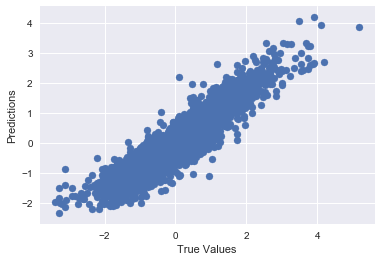

In [17]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show();

In [18]:
print("Score:", model.score(X_test, y_test))

Score: 0.866398625236585


In [31]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [20]:
# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print('Cross-validated scores:', scores)

Cross-validated scores: [ 8.66182185e-01  8.64903222e-01  8.70997796e-01 -5.06139458e+18
  8.60637276e-01]


In [ ]:
# Make cross validated predictions
cross_predictions = cross_val_predict(model, X.iloc[:,:45], y, cv=5)
plt.scatter(y, cross_predictions);

In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(model, X, y, cv=10)
print('Cross-validated scores:', scores)

In [ ]:
# Perform 20-fold cross validation
scores = cross_val_score(model, X, y, cv=20)
print('Cross-validated scores:', scores)

In [ ]:
accuracy = metrics.r2_score(y, cross_predictions)
print('Cross-Predicted Accuracy:', accuracy)

In [ ]:
df.columns

In [ ]:
# Run a multiple linear regression to predict the dependent variable using all the independent variables:
import statsmodels.api as sn
from statsmodels.formula.api import ols

outcome = 'log_price'
predictors = df.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula=formula, data=df).fit()
model.summary()

In [ ]:
df.columns

In [ ]:
df.columns[4:17]

In [21]:
df_smaller= df.drop(['zc_98001',
       'zc_98002', 'zc_98003', 'zc_98004', 'zc_98005', 'zc_98006', 'zc_98007',
       'zc_98008', 'zc_98010', 'zc_98011', 'zc_98014', 'zc_98019', 'zc_98022',
       'zc_98023', 'zc_98024', 'zc_98027', 'zc_98028', 'zc_98029', 'zc_98030',
       'zc_98031', 'zc_98032', 'zc_98033', 'zc_98034', 'zc_98038', 'zc_98039',
       'zc_98040', 'zc_98042', 'zc_98045', 'zc_98052', 'zc_98053', 'zc_98055',
       'zc_98056', 'zc_98058', 'zc_98059', 'zc_98065', 'zc_98070', 'zc_98072',
       'zc_98074', 'zc_98075', 'zc_98077', 'zc_98092', 'zc_98102', 'zc_98103',
       'zc_98105', 'zc_98106', 'zc_98107', 'zc_98108', 'zc_98109', 'zc_98112',
       'zc_98115', 'zc_98116', 'zc_98117', 'zc_98118', 'zc_98119', 'zc_98122',
       'zc_98125', 'zc_98126', 'zc_98133', 'zc_98136', 'zc_98144', 'zc_98146',
       'zc_98148', 'zc_98155', 'zc_98166', 'zc_98168', 'zc_98177', 'zc_98178',
       'zc_98188', 'zc_98198', 'zc_98199'], axis=1)

In [22]:
df_smaller.columns

Index(['log_price', 'log_bathrooms', 'log_bedrooms', 'log_sqft_living',
       'log_lat', 'flrs_1', 'flrs_1_5', 'flrs_2', 'flrs_2_5', 'flrs_3',
       'flrs_3_5', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'view_0', 'view_1', 'view_2', 'view_3', 'view_4'],
      dtype='object')

In [23]:
df_smaller = df_smaller.drop(['flrs_1', 'flrs_1_5', 'flrs_2', 'flrs_2_5', 'flrs_3',
       'flrs_3_5'], axis=1)

In [24]:
df_smaller = df_smaller.drop(['view_0', 'view_1', 'view_2', 'view_3', 'view_4'], axis=1)

In [25]:
df_smaller.head()

,log_price,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
8214,0.163483,1.641219,1.524289,1.680579,-0.568756,0,0,0,0,1,0,0,0,0,0,0
8863,-0.245352,-0.300676,-0.279725,-0.407754,-1.061823,0,0,0,0,1,0,0,0,0,0,0
13890,0.321840,0.608114,-0.279725,0.210765,-0.093711,0,0,0,0,0,1,0,0,0,0,0
9306,-1.507164,-1.726549,-0.279725,-1.587587,-1.847712,0,0,0,1,0,0,0,0,0,0,0
19986,0.043414,0.339661,-0.279725,-1.105688,0.843618,0,0,0,0,1,0,0,0,0,0,0


In [36]:
import statsmodels.api as sn
from statsmodels.formula.api import ols

outcome = 'log_price'
predictors = df_smaller.drop(['log_price','grade_3','grade_4','grade_5','grade_6','grade_7','grade_8'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula=formula, data=df_smaller).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     5324.
Date:                Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:36:54   Log-Likelihood:                -18019.
No. Observations:               21597   AIC:                         3.606e+04
Df Residuals:                   21587   BIC:                         3.614e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1213      0.004    -27.122      0.000      -0.130      -0.113
grade_9[T.1]        0.4491      0.013     34.239      0.000       0.423       0.475
grade_10[T.1]       0.7489      0.019     39.161      0.000       0.711       0.786
grade_11[T.1]       1.0804      0.030     35.566      0.000       1.021       1.140
grade_12[T.1]       1.5521      0.061     25.499      0.000       1.433       1.671
grade_13[T.1]       2.0560      0.156     13.209      0.000       1.751       2.361
log_bathrooms       0.0442      0.006      7.536      0.000       0.033       0.056
log_bedrooms       -0.0717      0.005    -14.030      0.000      -0.082      -0.062
log_sqft_living     0.5103      0.007     68.711      0.000       0.496       0.525
log_lat             0.4039      0.004    105.873      0.000       0.396       0.411
==============================================================================
Omnibus:                      505.477   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.683
Skew:                           0.289   Prob(JB):                    1.03e-145
Kurtosis:                       3.639   Cond. No.                         62.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X1= df_smaller.drop(['log_price','grade_3','grade_4','grade_5','grade_6','grade_7','grade_8'], axis=1)
X1.head()

,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,grade_9,grade_10,grade_11,grade_12,grade_13
8214,1.641219,1.524289,1.680579,-0.568756,0,0,0,0,0
8863,-0.300676,-0.279725,-0.407754,-1.061823,0,0,0,0,0
13890,0.608114,-0.279725,0.210765,-0.093711,0,0,0,0,0
9306,-1.726549,-0.279725,-1.587587,-1.847712,0,0,0,0,0
19986,0.339661,-0.279725,-1.105688,0.843618,0,0,0,0,0


In [27]:
# Perform 5-fold cross validation
scores = cross_val_score(model, X1, y, cv=5, scoring="r2")
print('Cross-validated scores:', scores)

Cross-validated scores: [0.69195174 0.68604444 0.6945983  0.68221942 0.68936661]


In [28]:
# Perform 10-fold cross validation
scores = cross_val_score(model, X1, y, cv=10, scoring='r2')
print('Cross-validated scores:', scores)

Cross-validated scores: [0.6921456  0.69234658 0.69414658 0.67803645 0.69199297 0.69559568
 0.67511506 0.68920183 0.70855879 0.6666693 ]


In [29]:
# Perform 20-fold cross validation
scores = cross_val_score(model, X1, y, cv=20)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.68440855 0.70022055 0.69191278 0.69174771 0.69059756 0.69722597
 0.68801467 0.66634535 0.6934608  0.69056923 0.7136658  0.67712268
 0.67603158 0.67345882 0.67722422 0.70141151 0.70707708 0.71085139
 0.66084995 0.67135818]


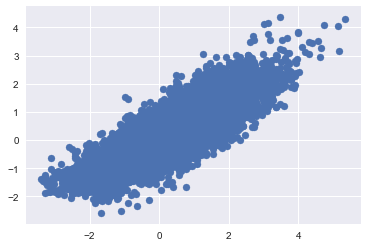

In [33]:
# Make cross validated predictions
cross_predictions = cross_val_predict(model, X1, y, cv=5)
plt.scatter(y, cross_predictions);

In [34]:
accuracy = metrics.r2_score(y, cross_predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.6889112312921786


In [ ]:
# Perform a train-test-split on the 5 features selected by the RFE:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
select_5 = RFE(linreg, n_features_to_select = 5)
select_5 = select_5.fit(X_train, np.ravel(y_train))
selected_columns = X.columns[select_5.support_ ]
linreg.fit(X_train[selected_columns],y_train)
y_hat_train_5 = linreg.predict(X_train[selected_columns])
y_hat_test_5 =  linreg.predict(X_test[selected_columns])
train_resid_5 = y_hat_train_5 - y_train
test_resid_5 = y_hat_test_5 - y_test
mse_train_5 = np.sum((y_train - y_hat_train_5)**2) / len(y_train)
mse_test_5 = np.sum((y_test - y_hat_test_5)**2) / len(y_test)
print("Selected columns:", selected_columns)
print("MSE Test:",round(mse_test_5, 4))
print("MSE Train:", round(mse_train_5,4))

In [35]:
# The mse of the training and test data are very close so the model is predicting well.
# Using only the 5 features selected by the RFE the mse value goes up so it's better to use my the whole model than
# the RFE selected.